In [1]:
import pandas as pd

In [42]:
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('UScomments.csv', on_bad_lines= 'skip')
data

C:\Users\Ashley Nguyen\AppData\Local\Temp\ipykernel_9380\1017720112.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('UScomments.csv', on_bad_lines= 'skip')


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [3]:
data.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [4]:
data = data.dropna()

SENTIMENT ANALYSIS

In [5]:
from textblob import TextBlob


In [6]:
TextBlob('Hi').sentiment.polarity

0.0

In [7]:
print(len(data['comment_text']))

691374


In [8]:
data['polarity'] = [TextBlob(comment).sentiment.polarity for comment in data['comment_text']]


C:\Users\Ashley Nguyen\AppData\Local\Temp\ipykernel_9380\29786293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity'] = [TextBlob(comment).sentiment.polarity for comment in data['comment_text']]


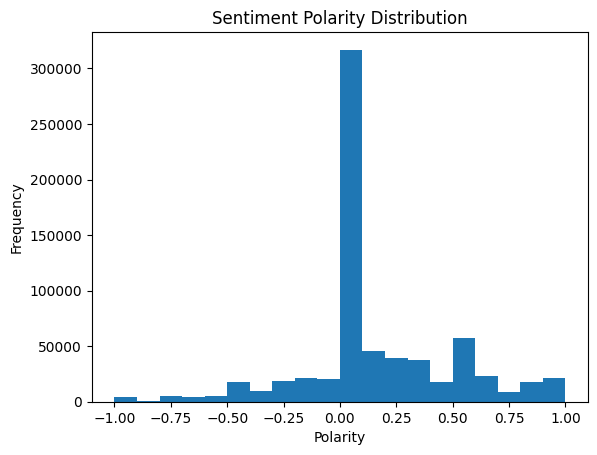

In [9]:
import matplotlib.pyplot as plt

plt.hist(data['polarity'], bins=20)
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Polarity Distribution')
plt.show()

WORDCLOUD ANALYSIS

COLLECT DATA FROM JSON FILES

In [10]:
import os

In [11]:
files = os.listdir(r'additional_data')
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

print csv files only

In [12]:
files_csv = [file for file in files if '.csv' in file]

merge csv file into 1 dataframe

In [13]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
total_df = pd.DataFrame()
for i in range(len(files_csv)):
    current_df =  pd.read_csv(f"additional_data/{files_csv[i]}", encoding='iso-8859-1', on_bad_lines='skip')
    total_df = pd.concat([total_df, current_df], ignore_index=True)

total_df




,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [15]:
# total_df.to_csv("total_videos.csv", index=False)


Analysing the most liked category

In [22]:
unique_category = total_df['category_id'].unique()
unique_category

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [27]:
json_file = pd.read_json(r"additional_data\US_category_id.json" )
json_file[]

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [37]:
category_id_name = {}
for item in json_file['items'].values:
    category_id_name[int(item['id'])] = item['snippet']['title']

category_id_name

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [38]:
total_df['category_name'] = total_df['category_id'].map(category_id_name)

In [40]:
category_liked = total_df.groupby('category_name')['likes'].sum()
category_liked

category_name
Autos & Vehicles           45461895
Comedy                   1081392644
Education                 117479047
Entertainment            2857743591
Film & Animation          589885590
Gaming                    298337663
Howto & Style             347338295
Movies                      1005417
Music                    7227198427
News & Politics           163503422
Nonprofits & Activism      93538593
People & Blogs            692550961
Pets & Animals             56601492
Science & Technology      252570921
Shows                       4570827
Sports                    399630743
Trailers                        198
Travel & Events            13494079
Name: likes, dtype: int64

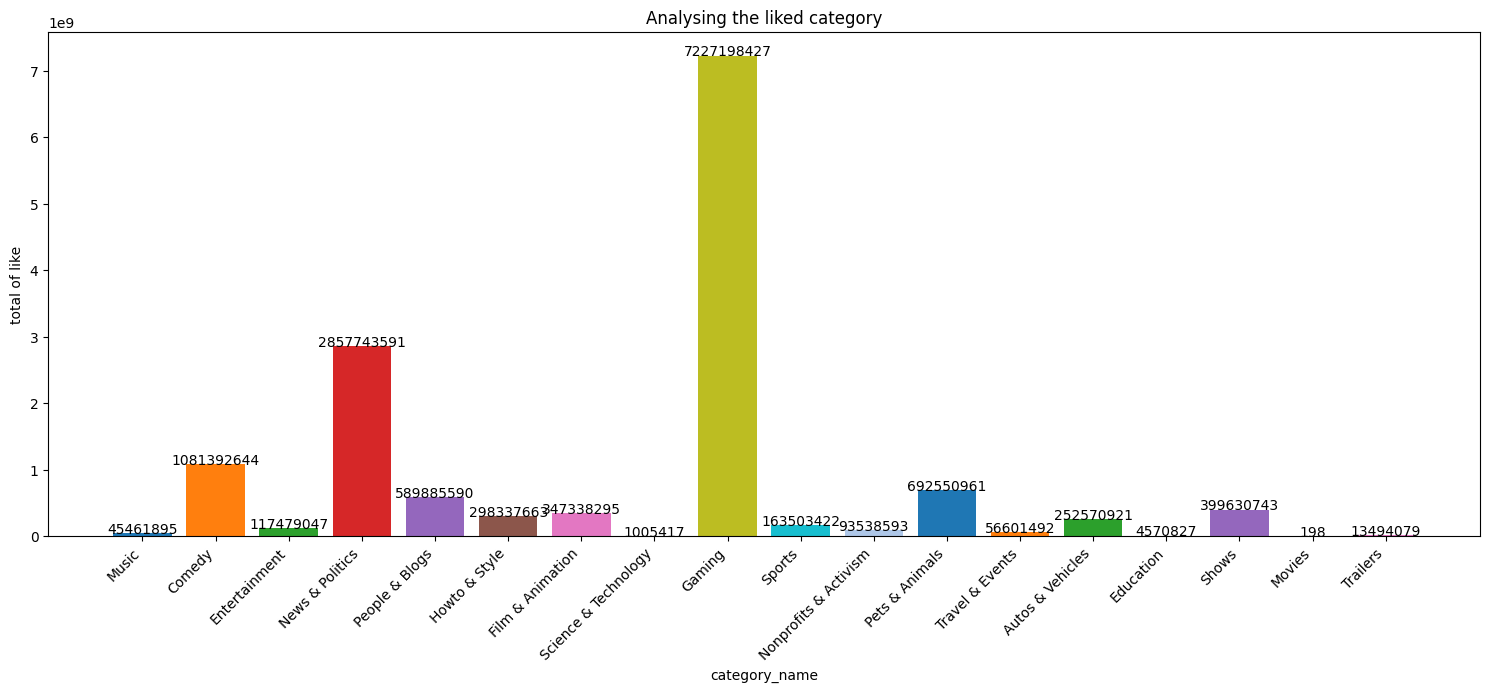

In [56]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')

x = total_df['category_name'].unique()
y = category_liked.values
# setting figure size by using figure() function
# Define custom colors for each part of the pie chart
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
                 '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8']

plt.figure(figsize = (15, 6))
plt.bar(x,y, color= custom_colors)
# calling the function to add value labels
addlabels(x, y)
plt.title('Analysing the liked category')
 # giving X and Y labels
plt.xlabel("category_name")
plt.ylabel("total of like")
plt.tight_layout()
plt.xticks(rotation=45)
# Get the current Axes object
ax = plt.gca()

# Manually adjust the position of labels
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, ha='right')
plt.show()

In [41]:
category_disliked = total_df.groupby('category_name')['dislikes'].sum()
category_disliked

category_name
Autos & Vehicles           2571460
Comedy                    40698333
Education                  3710565
Entertainment            248270342
Film & Animation          25279207
Gaming                    19534374
Howto & Style             12756984
Movies                       50242
Music                    294657819
News & Politics           28778398
Nonprofits & Activism     24670453
People & Blogs            56634003
Pets & Animals             1503766
Science & Technology      12218574
Shows                       682505
Sports                    26536025
Trailers                         9
Travel & Events             739962
Name: dislikes, dtype: int64

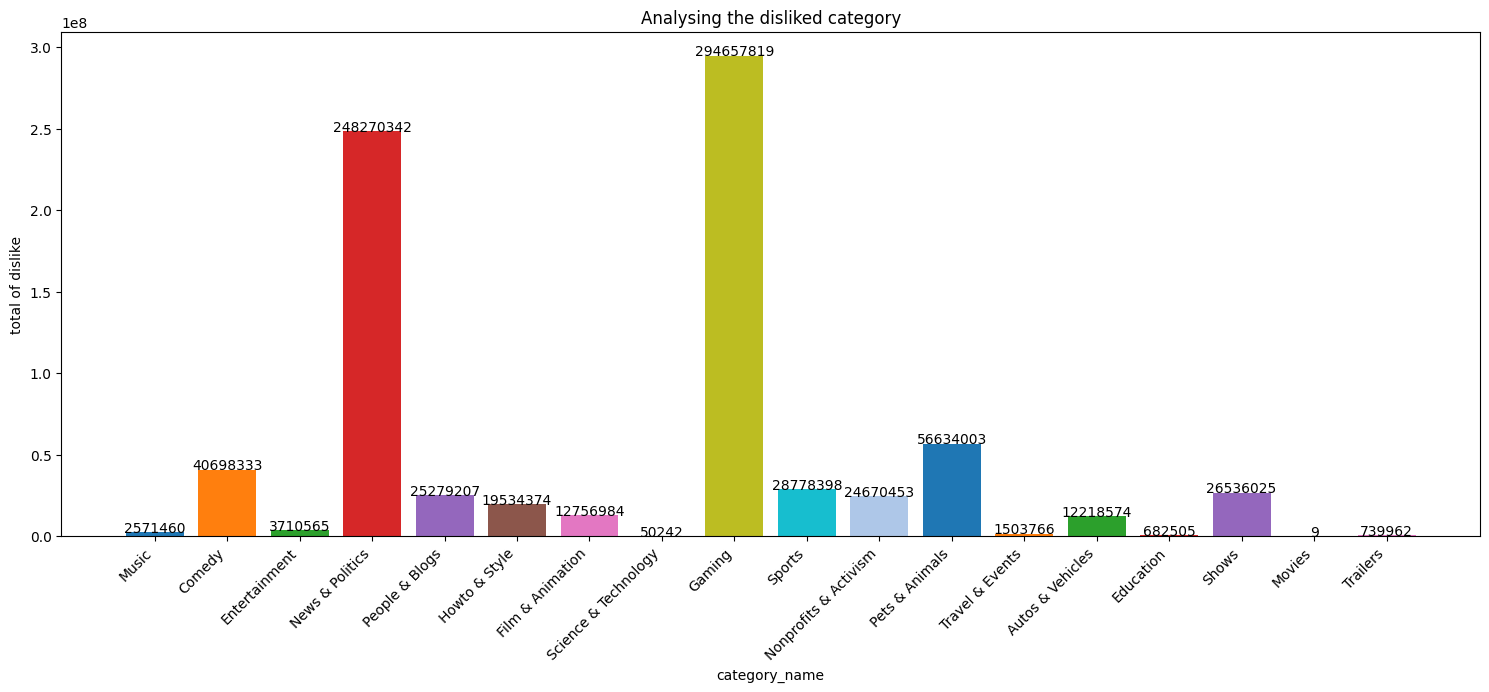

In [55]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')

x = total_df['category_name'].unique()
y = category_disliked.values
# setting figure size by using figure() function
# Define custom colors for each part of the pie chart
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
                 '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8']

plt.figure(figsize = (15, 6))
plt.bar(x,y, color= custom_colors)
# calling the function to add value labels
addlabels(x, y)
plt.title('Analysing the disliked category')
 # giving X and Y labels
plt.xlabel("category_name")
plt.ylabel("total of dislike")
plt.tight_layout()
plt.xticks(rotation=45)
# Get the current Axes object
ax = plt.gca()

# Manually adjust the position of labels
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, ha='right')
plt.show()

Find out whether audience is engaged or not

In [61]:
total_df[['likes', 'views', 'dislikes', 'comment_count']].corr()

,likes,views,dislikes,comment_count
likes,1.000000,0.777796,0.453710,0.794490
views,0.777796,1.000000,0.421653,0.510030
dislikes,0.453710,0.421653,1.000000,0.705182
comment_count,0.794490,0.510030,0.705182,1.000000


In [62]:
total_df['like_rate'] = total_df['likes']/total_df['views']
total_df['dislike_rate'] = total_df['dislikes']/total_df['views']
total_df['comment_count_rate'] = total_df['comment_count']/total_df['views']

In [63]:
total_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,0.045891,0.002531,0.007336
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,0.125949,0.001664,0.012842
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,0.045758,0.001673,0.002563
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,0.063096,0.000949,0.008359
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,0.048746,0.000629,0.002538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals,0.022639,0.000822,0.001576
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs,0.056356,0.000359,0.003696
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment,0.045073,0.000968,0.003743
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation,0.034086,0.000503,0.002312


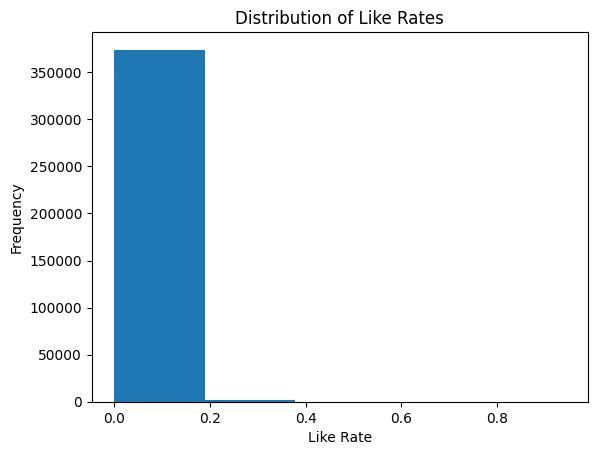

In [65]:

# Assuming your DataFrame is named df
plt.hist(total_df['like_rate'], bins=5)  # You can adjust the number of bins
plt.xlabel('Like Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Like Rates')
plt.show()
